<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Practice_Repo/blob/main/RNN_IMDB_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Conv1D, MaxPooling1D
from keras.utils import pad_sequences, np_utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
# 데이터 전처리
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [4]:
# 모델 생성
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                        

In [5]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
250/250 [==============================] - 36s 93ms/step - loss: 0.4546 - accuracy: 0.7697 - val_loss: 0.3521 - val_accuracy: 0.8417
Epoch 2/5
250/250 [==============================] - 8s 31ms/step - loss: 0.2916 - accuracy: 0.8773 - val_loss: 0.3277 - val_accuracy: 0.8578
Epoch 3/5
250/250 [==============================] - 5s 21ms/step - loss: 0.2460 - accuracy: 0.8989 - val_loss: 0.3426 - val_accuracy: 0.8500
Epoch 4/5
250/250 [==============================] - 3s 14ms/step - loss: 0.2120 - accuracy: 0.9144 - val_loss: 0.3363 - val_accuracy: 0.8566
Epoch 5/5
250/250 [==============================] - 3s 11ms/step - loss: 0.1766 - accuracy: 0.9330 - val_loss: 0.3589 - val_accuracy: 0.8542


In [7]:
# 테스트 정확도
print(f'Test Accuracy:{model.evaluate(x_test, y_test)[1]}')

# 테스트셋 오차
y_vloss = history.history['val_loss']

# 학습셋 오차
y_loss = history.history['loss']

782/782 [==============================] - 4s 4ms/step - loss: 0.3589 - accuracy: 0.8542
Test Accuracy:0.854200005531311


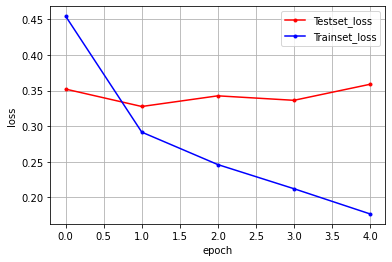

In [10]:
# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()